In [1]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import quandl


In [2]:
import numpy as np
import plotly.plotly as py
import plotly.graph_objs as go

In [30]:
from collections import Counter

In [23]:
!pip install seaborn

You are using pip version 18.1, however version 19.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [4]:
quandl.ApiConfig.api_key = QUANDL_API_KEY # Get yours through logging into Quandl for free
style.use('ggplot')

start = dt.datetime(2015, 1, 1)
end = dt.datetime.now()

In [24]:
import seaborn as sns

# this is the practice part

In [35]:
data = quandl.get_table('WIKI/PRICES', ticker = ['TSLA'], 
                        qopts = { 'columns': ['date', 'Close','High','Low','Open','Volume','adj close'] }, 
                        date = { 'gte': start, 'lte': end }, 
                        paginate=True)

In [36]:
data.head()

,ticker,date,close,high,low,open,volume
None,,,,,,,
0,TSLA,2018-03-27,279.18,304.27,277.18,304.00,13696168.0
1,TSLA,2018-03-26,304.18,307.59,291.36,307.34,8324639.0
2,TSLA,2018-03-23,301.54,311.61,300.45,311.25,6600538.0
3,TSLA,2018-03-22,309.10,318.82,308.18,313.89,4914307.0
4,TSLA,2018-03-21,316.53,322.44,310.19,310.25,5927881.0


In [37]:
temp = pd.DataFrame(data[::-1])

In [38]:
temp.head()

,ticker,date,close,high,low,open,volume
None,,,,,,,
812,TSLA,2015-01-02,219.310,223.2500,213.2600,222.87,4764443.0
811,TSLA,2015-01-05,210.090,216.5000,207.1626,214.55,5368477.0
810,TSLA,2015-01-06,211.280,214.2000,204.2100,210.06,6261936.0
809,TSLA,2015-01-07,210.950,214.7800,209.7800,213.35,2968390.0
808,TSLA,2015-01-08,210.615,213.7999,210.0100,212.81,3442509.0


In [40]:
temp.drop(columns=[ticker'])

SyntaxError: EOL while scanning string literal (<ipython-input-40-c63f66681eb1>, line 1)

In [41]:
# temp.reset_index(inplace=True)
# temp.set_index("date", inplace=True)

temp.head()

,ticker,date,close,high,low,open,volume
None,,,,,,,
812,TSLA,2015-01-02,219.310,223.2500,213.2600,222.87,4764443.0
811,TSLA,2015-01-05,210.090,216.5000,207.1626,214.55,5368477.0
810,TSLA,2015-01-06,211.280,214.2000,204.2100,210.06,6261936.0
809,TSLA,2015-01-07,210.950,214.7800,209.7800,213.35,2968390.0
808,TSLA,2015-01-08,210.615,213.7999,210.0100,212.81,3442509.0


In [43]:
temp.set_index('date', inplace =True)

In [44]:
temp.head()

,ticker,close,high,low,open,volume
date,,,,,,
2015-01-02,TSLA,219.310,223.2500,213.2600,222.87,4764443.0
2015-01-05,TSLA,210.090,216.5000,207.1626,214.55,5368477.0
2015-01-06,TSLA,211.280,214.2000,204.2100,210.06,6261936.0
2015-01-07,TSLA,210.950,214.7800,209.7800,213.35,2968390.0
2015-01-08,TSLA,210.615,213.7999,210.0100,212.81,3442509.0


In [45]:
temp.drop(columns=['ticker'])

,close,high,low,open,volume
date,,,,,
2015-01-02,219.310,223.2500,213.2600,222.87,4764443.0
2015-01-05,210.090,216.5000,207.1626,214.55,5368477.0
2015-01-06,211.280,214.2000,204.2100,210.06,6261936.0
2015-01-07,210.950,214.7800,209.7800,213.35,2968390.0
2015-01-08,210.615,213.7999,210.0100,212.81,3442509.0
2015-01-09,206.660,209.9800,204.9600,208.92,4580722.0
2015-01-12,202.210,204.4700,199.2500,203.05,5950280.0
2015-01-13,204.250,207.6100,200.9110,203.32,4477320.0
2015-01-14,192.690,195.2000,185.0000,185.83,11551855.0


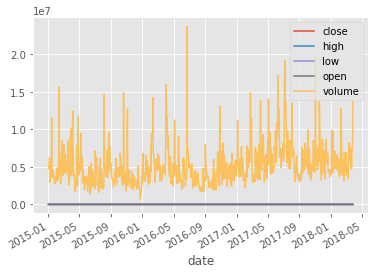

In [46]:
temp.plot()
plt.show()

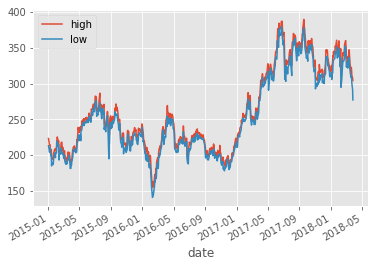

In [49]:
temp[['high','low']].plot()
plt.show()

# Trying to get the prices again for Research Purposes


In [58]:
start = dt.datetime(2010, 6, 9) 
data = quandl.get_table('WIKI/PRICES', ticker = ['TSLA'], 
                        qopts = { 'columns': ['date', 'Close','High','Low','Open','Volume','adj_close'] }, 
                        date = { 'gte': start, 'lte': end }, 
                        paginate=True)

In [59]:
data.head()

,date,close,high,low,open,volume,adj_close
None,,,,,,,
0,2018-03-27,279.18,304.27,277.18,304.00,13696168.0,279.18
1,2018-03-26,304.18,307.59,291.36,307.34,8324639.0,304.18
2,2018-03-23,301.54,311.61,300.45,311.25,6600538.0,301.54
3,2018-03-22,309.10,318.82,308.18,313.89,4914307.0,309.10
4,2018-03-21,316.53,322.44,310.19,310.25,5927881.0,316.53


In [60]:
data.set_index('date', inplace=True)

In [61]:
data = data[::-1]

In [62]:
data['100ma'] = data['adj_close'].rolling(window=100).mean()

In [63]:
data.head()

,close,high,low,open,volume,adj_close,100ma
date,,,,,,,
2010-06-29,23.89,25.0000,17.54,19.00,18766300.0,23.89,NaN
2010-06-30,23.83,30.4192,23.30,25.79,17187100.0,23.83,NaN
2010-07-01,21.96,25.9200,20.27,25.00,8218800.0,21.96,NaN
2010-07-02,19.20,23.1000,18.71,23.00,5139800.0,19.20,NaN
2010-07-06,16.11,20.0000,15.83,20.00,6866900.0,16.11,NaN


In [64]:
data['100ma'] = data['adj_close'].rolling(window=100,min_periods=0).mean()

In [65]:
data.head()

,close,high,low,open,volume,adj_close,100ma
date,,,,,,,
2010-06-29,23.89,25.0000,17.54,19.00,18766300.0,23.89,23.890000
2010-06-30,23.83,30.4192,23.30,25.79,17187100.0,23.83,23.860000
2010-07-01,21.96,25.9200,20.27,25.00,8218800.0,21.96,23.226667
2010-07-02,19.20,23.1000,18.71,23.00,5139800.0,19.20,22.220000
2010-07-06,16.11,20.0000,15.83,20.00,6866900.0,16.11,20.998000


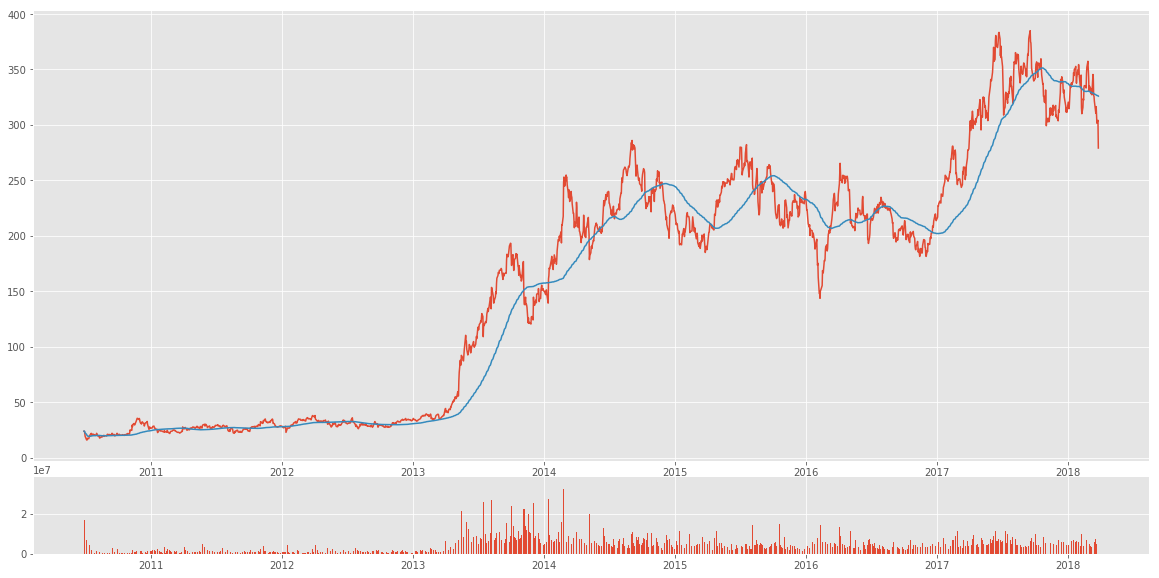

In [69]:
plt.figure(figsize=(20,10))
ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex = ax1)
ax1.plot(data.index, data['adj_close'])
ax1.plot(data.index, data['100ma'])
ax2.bar(data.index, data['volume'])

plt.show()

# OHLC chart or a candlestick chart

In [70]:
from matplotlib.finance import candlestick_ohlc
import matplotlib.dates as mdates

ImportError: No module named 'matplotlib.finance'

# Practice over kaam chalo

Will do the above part later with (pip install https://github.com/matplotlib/mpl_finance/archive/master.zip) after dowloading mpl_finance

### scraping list of S&P 500 companies using beautifulSoup 

In [5]:
import bs4 as bs
import pickle
import requests

In [6]:
import datetime as dt
import os


### we will get data from wikipedia

In [7]:
def save_sp_tickers():
    resp  = requests.get('http://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    soup = bs.BeautifulSoup(resp.text, 'lxml')
    table = soup.find('table', {'class':'wikitable sortable'})
    
    tickers = []
    for row in table.findAll('tr')[1:]:
        ticker = row.findAll('td')[0].text
        tickers.append(ticker)
        
    with open("sp500tickers.pickle","wb") as f:
        pickle.dump(tickers,f)
    return tickers



In [8]:
tickers = save_sp_tickers()

In [9]:
print(tickers)

['MMM', 'ABT', 'ABBV', 'ABMD', 'ACN', 'ATVI', 'ADBE', 'AMD', 'AAP', 'AES', 'AMG', 'AFL', 'A', 'APD', 'AKAM', 'ALK', 'ALB', 'ARE', 'ALXN', 'ALGN', 'ALLE', 'AGN', 'ADS', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'ABC', 'AME', 'AMGN', 'APH', 'APC', 'ADI', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'AIV', 'AAPL', 'AMAT', 'APTV', 'ADM', 'ARNC', 'ANET', 'AJG', 'AIZ', 'T', 'ADSK', 'ADP', 'AZO', 'AVB', 'AVY', 'BHGE', 'BLL', 'BAC', 'BK', 'BAX', 'BBT', 'BDX', 'BRK-B', 'BBY', 'BIIB', 'BLK', 'HRB', 'BA', 'BKNG', 'BWA', 'BXP', 'BSX', 'BHF', 'BMY', 'AVGO', 'BR', 'BF-B', 'CHRW', 'COG', 'CDNS', 'CPB', 'COF', 'CPRI', 'CAH', 'KMX', 'CCL', 'CAT', 'CBOE', 'CBRE', 'CBS', 'CE', 'CELG', 'CNC', 'CNP', 'CTL', 'CERN', 'CF', 'SCHW', 'CHTR', 'CVX', 'CMG', 'CB', 'CHD', 'CI', 'XEC', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CTXS', 'CLX', 'CME', 'CMS', 'KO', 'CTSH', 'CL', 'CMCSA', 'CMA', 'CAG', 'CXO', 'COP', 'ED', 'STZ', 'COO', 'CPRT', 'GLW', 'COST', 'COTY', 'CCI', 'CS

In [10]:
# dont know why this is yahoo!
def get_data_from_yahoo(reload_sp500=False):
    if reload_sp500:
        tickers = save_sp500_tickers()
    else:
        with open("sp500tickers.pickle", "rb") as f:
            tickers = pickle.load(f)

In [11]:
start =dt.datetime(2010,1,1)
end = dt.datetime.now()

df = quandl.get_table('WIKI/PRICES', ticker = ['TSLA'], 
                        date = { 'gte': start, 'lte': end }, 
                        paginate=True)
df.head()
# cool so without the columns all the columns come in
# kinda intuitive but still cool

,ticker,date,open,high,low,close,volume,ex-dividend,split_ratio,adj_open,adj_high,adj_low,adj_close,adj_volume
None,,,,,,,,,,,,,,
0,TSLA,2018-03-27,304.00,304.27,277.18,279.18,13696168.0,0.0,1.0,304.00,304.27,277.18,279.18,13696168.0
1,TSLA,2018-03-26,307.34,307.59,291.36,304.18,8324639.0,0.0,1.0,307.34,307.59,291.36,304.18,8324639.0
2,TSLA,2018-03-23,311.25,311.61,300.45,301.54,6600538.0,0.0,1.0,311.25,311.61,300.45,301.54,6600538.0
3,TSLA,2018-03-22,313.89,318.82,308.18,309.10,4914307.0,0.0,1.0,313.89,318.82,308.18,309.10,4914307.0
4,TSLA,2018-03-21,310.25,322.44,310.19,316.53,5927881.0,0.0,1.0,310.25,322.44,310.19,316.53,5927881.0


In [12]:
# Now pulling data for all the 500 companies!

start =dt.datetime(2010,1,1)
end = dt.datetime.now()

for ticker in tickers:
    if not os.path.exists('stock_dfs/{}.csv'.format(ticker)):
        df = quandl.get_table('WIKI/PRICES', ticker = ticker, 
                        date = { 'gte': start, 'lte': end }, 
                        paginate=True)
        df.drop(columns = ['ticker'])
        df.set_index('date', inplace=True)
        df = df[::-1]
        df.to_csv('stock_dfs/{}.csv'.format(ticker))
    else:
        print('Already have ()'.format(ticker))

Already have ()
Already have ()
Already have ()
Already have ()
Already have ()
Already have ()
Already have ()
Already have ()
Already have ()
Already have ()
Already have ()
Already have ()
Already have ()
Already have ()
Already have ()
Already have ()
Already have ()
Already have ()
Already have ()
Already have ()
Already have ()
Already have ()
Already have ()
Already have ()
Already have ()
Already have ()
Already have ()
Already have ()
Already have ()
Already have ()
Already have ()
Already have ()
Already have ()
Already have ()
Already have ()
Already have ()
Already have ()
Already have ()
Already have ()
Already have ()
Already have ()
Already have ()
Already have ()
Already have ()
Already have ()
Already have ()
Already have ()
Already have ()
Already have ()
Already have ()
Already have ()
Already have ()
Already have ()
Already have ()
Already have ()
Already have ()
Already have ()
Already have ()
Already have ()
Already have ()
Already have ()
Already have ()
Already 

In [13]:
def compile_data():
    # Combining the data from all these csv files

    with open('sp500tickers.pickle', 'rb') as f:
        tickers = pickle.load(f)

    main_df = pd.DataFrame()

    for count, ticker in enumerate(tickers):
        df = pd.read_csv('stock_dfs/{}.csv'.format(ticker))
        df.set_index('date', inplace=True)

        df.rename(columns={'adj_close':ticker}, inplace = True)
        df.drop(['ticker','open','high','low','close','volume','ex-dividend','split_ratio','adj_open','adj_high','adj_low','adj_volume'],1,inplace = True)

        if main_df.empty:
            main_df = df
        else:
            main_df = main_df.join(df, how='outer',lsuffix='_left', rsuffix = '_right')

        if count % 10 == 0:
            print(count)
    print(main_df.head())
    main_df.to_csv('sp500_joined_closes.csv')

In [14]:
compile_data()

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
                  MMM        ABT  ABBV  ABMD        ACN       ATVI   ADBE  \
date                                                                        
2010-01-04  68.346207  21.229632   NaN  8.74  35.484403  10.329469  37.09   
2010-01-05  67.918117  21.058111   NaN  8.53  35.703703  10.347752  37.70   
2010-01-06  68.881320  21.175058   NaN  8.40  36.083260  10.292905  37.62   
2010-01-07  68.930715  21.350477   NaN  8.40  36.049522  10.046095  36.89   
2010-01-08  69.416432  21.459627   NaN  8.23  35.906134   9.963824  36.69   

             AMD        AAP        AES ...   WLTW       WYNN        XEL  \
date                                   ...                                
2010-01-04  9.70  39.554636  11.815758 ...    NaN  44.777075  15.679078   
2010-01-05  9.71  39.319541  11.694748 ...

In [25]:
def visualize_data():
    df = pd.read_csv('sp500_joined_closes.csv')
    sns.lineplot(x='date', y='AAPL', data = df)
    plt.show()

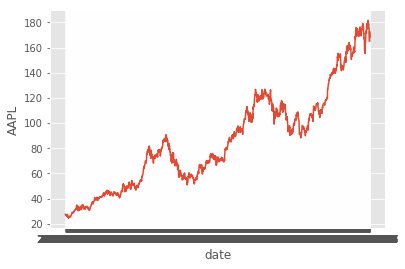

In [26]:
visualize_data()


In [101]:
def visualize_corr():
    df = pd.read_csv('sp500_joined_closes.csv')
    df_corr = df.corr()
    df_corr.to_csv('sp500corr.csv')
    data1 = df_corr.values
#     plt.figure(figsize=(20,10))
    fig1 = plt.figure(figsize=(20,10))
    ax1 = fig1.add_subplot(111)
    
    heatmap1 = ax1.pcolor(data1,cmap = plt.cm.RdYlGn)
    fig1.colorbar(heatmap1)
    
    ax1.set_xticks(np.arange(data1.shape[1])+0.5, minor = False)
    ax1.set_yticks(np.arange(data1.shape[0])+0.5, minor = False)
    ax1.invert_yaxis()
    ax1.xaxis.tick_top()
    
    column_labels = df_corr.columns
    row_labels = df_corr.index
    ax1.set_xticklabels(column_labels)
    ax1.set_yticklabels(row_labels)
    
    plt.xticks(rotation=90)
    heatmap1.set_clim(-1,1)
    plt.tight_layout()
    plt.show()

In [27]:
def sns_vis_corr():
    data1 = pd.read_csv('sp500corr.csv').values
    fig1 = plt.figure(figsize=(20,10))
    ax1 = fig1.add_subplot(111)
    ax1 = sns.heatmap(data1)

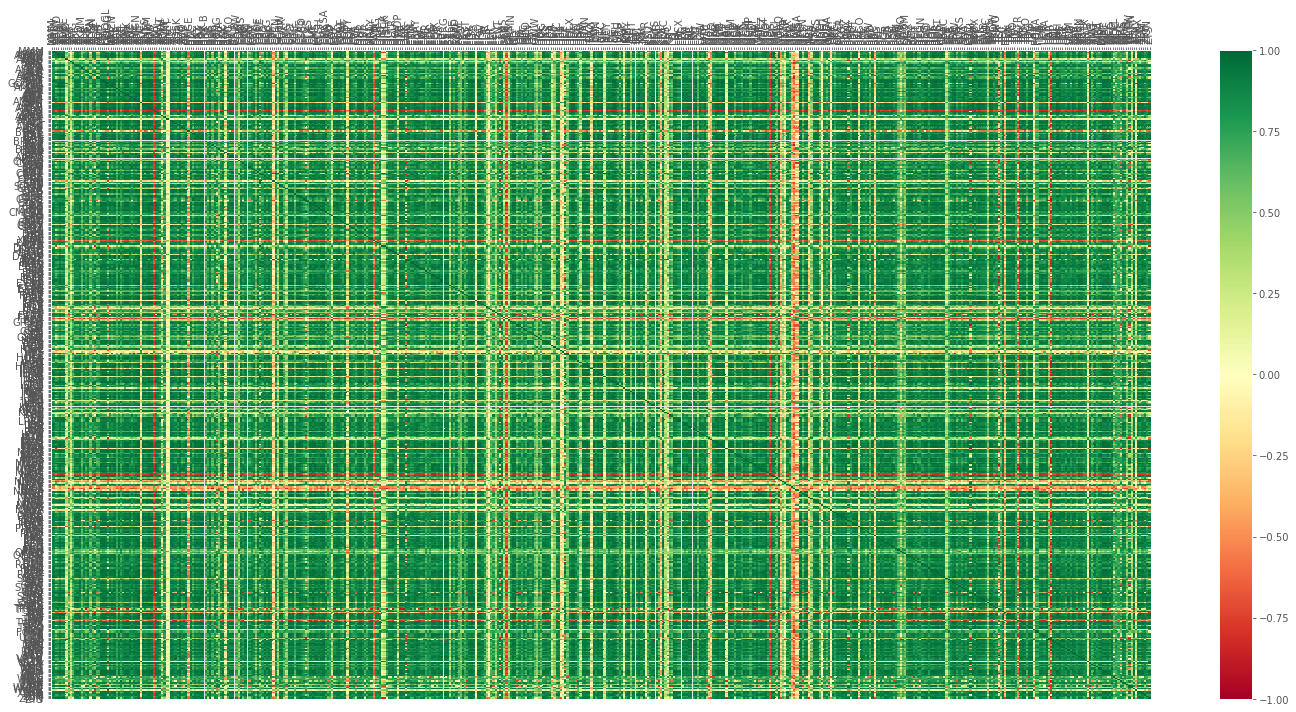

In [102]:
visualize_corr()

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

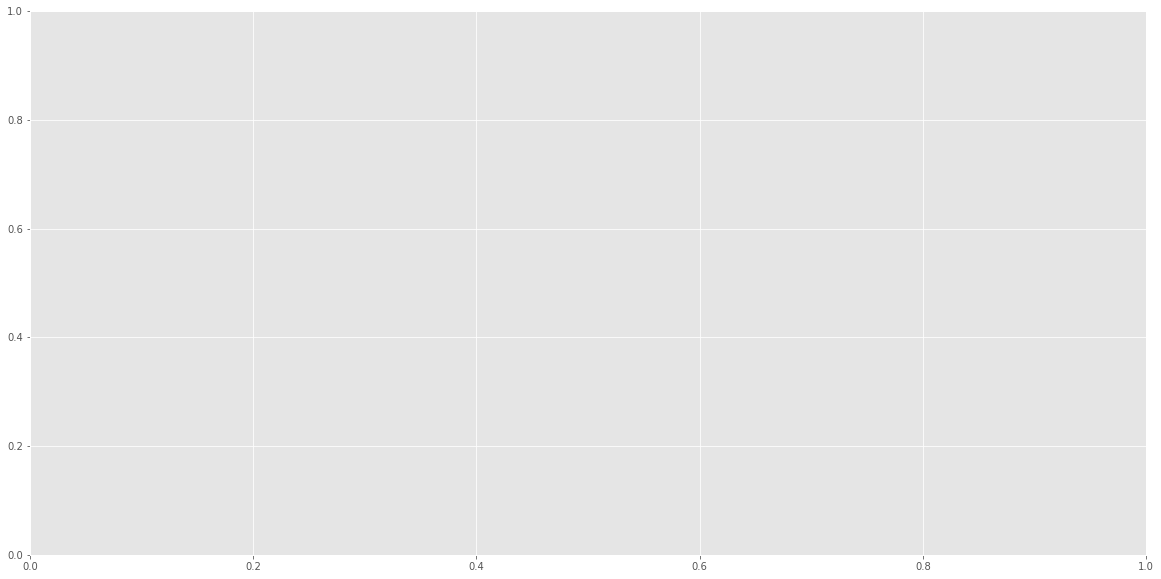

In [28]:
sns_vis_corr()

###  Can't zoom into this heatmap will try to plot it in an interactive way(atleast navigation wise) use plotly

## PreprocessingData for Machine learning algo

In [31]:
def preprocess_data_for_labels(ticker):
    hm_days = 7
    df = pd.read_csv('sp500_joined_closes.csv', index_col=0)
    df.fillna(0, inplace=True)
    
    for i in range(1, hm_days+1):
        df['{}_{}d'.format(ticker,i)] = (df[ticker].shift(-i)-df[ticker])/df[ticker]
    
    df.fillna(0, inplace=True)
    return tickers, df

In [32]:
def buy_sell_hold(*args):
    cols = [c for c in args]
    requirement = 0.02
    for col in cols:
        if col> requirement:
            return 1
        if col < -requirement:
            return -1
    return 0

In [49]:
def extract_feature_sets(ticker):
    tickers, df = preprocess_data_for_labels(ticker)
    df['{}_target'.format(ticker)] = list(map(buy_sell_hold,
                                             df['{}_1d'.format(ticker)],
                                               df['{}_2d'.format(ticker)],
                                               df['{}_3d'.format(ticker)],
                                               df['{}_4d'.format(ticker)],
                                               df['{}_5d'.format(ticker)],
                                               df['{}_6d'.format(ticker)],
                                               df['{}_7d'.format(ticker)]))
    vals = df['{}_target'.format(ticker)].values.tolist()
    str_vals = [str(i) for i in vals]
    print('data spread:', Counter(str_vals))
    df.fillna(0, inplace=True)
    
    df=df.replace([np.inf, -np.inf], np.nan)
    df.dropna(inplace=True)
    
    df_vals = df[[ticker for ticker in tickers]].pct_change()
    df_vals = df_vals.replace([np.inf, -np.inf], 0)
    df_vals.fillna(0, inplace=True)
    
    X = df_vals.values
    y = df['{}_target'.format(ticker)].values
    return X,y,df

In [38]:
extract_feature_sets('AAPL')

data spread: Counter({'1': 925, '-1': 796, '0': 351})


In [45]:
from sklearn import svm, neighbors
from sklearn.ensemble import VotingClassifier, RandomForestClassifier

In [46]:
from sklearn.model_selection import train_test_split

In [57]:
def do_ml(ticker):
    X , y , df =extract_feature_sets(ticker)
    
    X_train , X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25) # import train test split here not this
    
#     clf = neighbors.KNeighborsClassifier() # not gonna work use a latest function
    clf = VotingClassifier([('lsvc',svm.LinearSVC()),
                            ('knn',neighbors.KNeighborsClassifier()),
                            ('rfor',RandomForestClassifier())])
    
    clf.fit(X_train, y_train)
    
    confidence = clf.score(X_test, y_test)
    print('Accuracy: ',confidence)
    predictions = clf.predict(X_test)
    
    print('Predicted spread: ', Counter(predictions))
    
    return confidence

In [54]:
do_ml('XOM') # simple classifer without anything

data spread: Counter({'0': 830, '1': 652, '-1': 590})
Accuracy:  0.33783783783783783
Predicted spread:  Counter({-1: 259, 0: 224, 1: 35})


0.33783783783783783

In [55]:
do_ml('AAPL')# simple classifer without anything

data spread: Counter({'1': 925, '-1': 796, '0': 351})
Accuracy:  0.41505791505791506
Predicted spread:  Counter({-1: 316, 1: 146, 0: 56})


0.41505791505791506

In [56]:
do_ml('ABT')# simple classifer without anything

data spread: Counter({'1': 787, '0': 708, '-1': 577})
Accuracy:  0.3667953667953668
Predicted spread:  Counter({1: 287, 0: 143, -1: 88})


0.3667953667953668

In [59]:
do_ml('XOM')
do_ml('AAPL')
do_ml('ABT')

data spread: Counter({'0': 830, '1': 652, '-1': 590})


c:\users\pranav nema\anaconda2\envs\deeplearning\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



Accuracy:  0.3783783783783784
Predicted spread:  Counter({0: 299, -1: 159, 1: 60})
data spread: Counter({'1': 925, '-1': 796, '0': 351})


c:\users\pranav nema\anaconda2\envs\deeplearning\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



Accuracy:  0.4247104247104247
Predicted spread:  Counter({-1: 276, 1: 238, 0: 4})
data spread: Counter({'1': 787, '0': 708, '-1': 577})


c:\users\pranav nema\anaconda2\envs\deeplearning\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



Accuracy:  0.3552123552123552
Predicted spread:  Counter({1: 254, 0: 135, -1: 129})


0.3552123552123552